In [ ]:
!mkdir ia-rna


In [ ]:
#!wget -c "https://raw.githubusercontent.com/RebeccaMartinho/dataset/main/heart_statlog.csv?token=AJQ425BDIBUBCGUAQNYE2CTA2HFPE"

In [ ]:
!mv heart_statlog.csv /content/ia-rna

In [74]:
import numpy as np
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import svm, metrics
import keras as keras

In [111]:


#https://www.kaggle.com/sid321axn/heart-statlog-cleveland-hungary-final?select=heart_statlog_cleveland_hungary_final.csv
# load data - previsão de doenças cardíacas
datasett = loadtxt('/content/ia-rna/heart_statlog.csv', delimiter=',')

#example of a normalization
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
data = datasett
scaler = MinMaxScaler()
dataset = scaler.fit_transform(data)

X = dataset[:,0:11] #dados
y = dataset[:,11] #classes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)



In [112]:

# define model
model = Sequential()
#input_dim = dimensão de entrada, quantos atributos existem na base de dados sem o vetor classe
model.add(Dense(100, input_dim=X.shape[1], activation='relu'))#primeira camada
model.add(keras.layers.Dropout(0.2))
model.add(Dense(33, activation='relu'))#segunda camada
model.add(keras.layers.Dropout(0.2))
model.add(Dense(11, activation='relu'))#3 camada
model.add(keras.layers.Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))#camada de saida

In [113]:
# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adagrad(learning_rate=0.001,
#     initial_accumulator_value=0.1,
#     epsilon=1e-07,
#     name="Adagrad",
# ), metrics=['accuracy'])
    
# model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.RMSprop(
#     learning_rate=0.009,
#     rho=0.9,
#     momentum=0.0,
#     epsilon=1e-07,
#     centered=False,
#     name="RMSprop",
# ),  metrics=['accuracy'])


In [114]:

# fit model //treinamento

#batch_size - quantidade de amostras passadas pela rede neural a cada treinamento
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=100)
print(history.history.keys())




Epoch 1/200
8/8 [==============================] - 1s 57ms/step - loss: 0.6997 - accuracy: 0.4948 - val_loss: 0.6573 - val_accuracy: 0.5674
Epoch 2/200
8/8 [==============================] - 0s 8ms/step - loss: 0.6669 - accuracy: 0.5513 - val_loss: 0.6303 - val_accuracy: 0.7659
Epoch 3/200
8/8 [==============================] - 0s 8ms/step - loss: 0.6480 - accuracy: 0.6013 - val_loss: 0.6013 - val_accuracy: 0.7837
Epoch 4/200
8/8 [==============================] - 0s 7ms/step - loss: 0.6337 - accuracy: 0.6006 - val_loss: 0.5756 - val_accuracy: 0.7990
Epoch 5/200
8/8 [==============================] - 0s 9ms/step - loss: 0.6078 - accuracy: 0.6956 - val_loss: 0.5520 - val_accuracy: 0.7964
Epoch 6/200
8/8 [==============================] - 0s 8ms/step - loss: 0.5725 - accuracy: 0.7317 - val_loss: 0.5341 - val_accuracy: 0.8015
Epoch 7/200
8/8 [==============================] - 0s 8ms/step - loss: 0.5488 - accuracy: 0.7753 - val_loss: 0.5199 - val_accuracy: 0.8041
Epoch 8/200
8/8 [=========

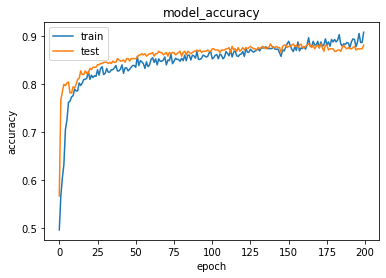

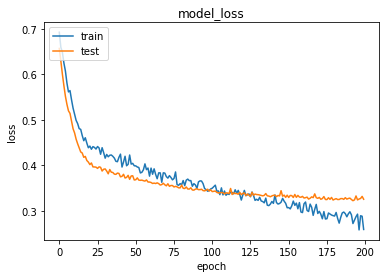

In [115]:
#Gráfico do desempenho da accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

#Gráfico do desempenho do loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [105]:
# evaluate model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

13/13 [==============================] - 0s 1ms/step - loss: 0.3316 - accuracy: 0.8753
Accuracy: 87.53


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[148  22]
 [ 27 196]]
TPR :  0.8789237668161435
TNR :  0.8705882352941177
ACC:  0.8753180661577609
AUC: 0.8747560010551305


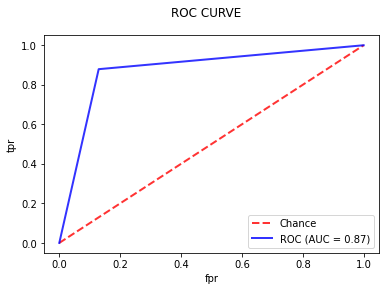

In [106]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

pred = model.predict_classes(X_test)
cm = confusion_matrix(y_test, pred)
print(cm)

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
tpr = tp/(tp+fn) #true positive
tnr = tn/(tn+fp) #true neg
acc = (tp+tn) / (tp+tn+fn+fp)
print("TPR : ", tpr)
print("TNR : ", tnr)
print("ACC: ", acc)

#AUC
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred, pos_label=1)
auc = metrics.auc(fpr, tpr)
print("AUC:", auc)

#grafico curva roc
plt.plot([0,1], [0,1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
plt.plot(fpr, tpr, color='b', label=r'ROC (AUC = %0.02F)' % (auc), lw=2, alpha=.8)
plt.suptitle('ROC CURVE')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend(loc='lower right')
plt.show()



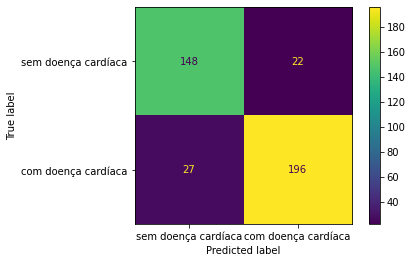

In [107]:
#matriz de confusão 
cmx = confusion_matrix(y_test, pred)
cmd = ConfusionMatrixDisplay(cmx, display_labels=['sem doença cardíaca','com doença cardíaca'])
cmd.plot(values_format='d')

In [ ]:
print(dataset)

[[0.24489796 1.         0.33333333 ... 0.29545455 0.33333333 0.        ]
 [0.42857143 0.         0.66666667 ... 0.40909091 0.66666667 1.        ]
 [0.18367347 1.         0.33333333 ... 0.29545455 0.33333333 0.        ]
 ...
 [0.59183673 1.         1.         ... 0.43181818 0.66666667 1.        ]
 [0.59183673 0.         0.33333333 ... 0.29545455 0.66666667 1.        ]
 [0.20408163 1.         0.66666667 ... 0.29545455 0.33333333 0.        ]]
